In [21]:
import requests

try:
    response = requests.get("https://api.ipify.org?format=json")
    print(response.json())
except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")


{'ip': '102.115.53.164'}


In [22]:
import requests

url = "https://meteostat.p.rapidapi.com/point/monthly"

querystring = {"lat":"52.5244","lon":"13.4105","alt":"43","start":"2001-01-01","end":"2020-12-31"}

headers = {
	"x-rapidapi-key": "1d84bd67c7mshdec672be0ab9e76p1f350fjsne89bf57c0e99",
	"x-rapidapi-host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())


{'meta': {'generated': '2024-08-25 16:12:40', 'stations': ['10384', '10382', '10381', 'D0420']}, 'data': [{'date': '2001-01-01', 'tavg': 1.2, 'tmin': -1.2, 'tmax': 3.3, 'prcp': 37.0, 'wspd': 12.4, 'pres': 1015.7, 'tsun': 3300}, {'date': '2001-02-01', 'tavg': 2.0, 'tmin': -1.3, 'tmax': 5.3, 'prcp': 31.0, 'wspd': 15.7, 'pres': 1016.3, 'tsun': 3600}, {'date': '2001-03-01', 'tavg': 3.4, 'tmin': 0.6, 'tmax': 6.4, 'prcp': 41.0, 'wspd': 12.8, 'pres': 1008.0, 'tsun': 5520}, {'date': '2001-04-01', 'tavg': 8.5, 'tmin': 4.3, 'tmax': 12.9, 'prcp': 34.0, 'wspd': 14.2, 'pres': 1011.8, 'tsun': 6660}, {'date': '2001-05-01', 'tavg': 15.1, 'tmin': 9.7, 'tmax': 20.2, 'prcp': 42.0, 'wspd': 13.8, 'pres': 1016.5, 'tsun': 16200}, {'date': '2001-06-01', 'tavg': 15.2, 'tmin': 10.6, 'tmax': 20.3, 'prcp': 66.0, 'wspd': 12.7, 'pres': 1014.1, 'tsun': 10380}, {'date': '2001-07-01', 'tavg': 20.4, 'tmin': 14.8, 'tmax': 25.7, 'prcp': 50.0, 'wspd': 12.1, 'pres': 1014.0, 'tsun': 14160}, {'date': '2001-08-01', 'tavg': 19

In [23]:
import requests
import pandas as pd
import os


In [24]:
# Replace with your valid API key
api_key = "1d84bd67c7mshdec672be0ab9e76p1f350fjsne89bf57c0e99"
url = "https://meteostat.p.rapidapi.com/stations/monthly"
querystring = {"station": "10673", "start": "2001-01-01", "end": "2020-12-31"}
headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "meteostat.p.rapidapi.com"
}


In [25]:
response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    json_data = response.json()
    # Print the JSON structure to inspect it
    print(json_data)

    # Extract the data (assuming 'data' is the key containing the relevant information)
    # Adjust 'data' according to the actual JSON structure
    data = json_data.get('data', [])

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Save DataFrame to CSV
    df.to_csv('meteostat_monthly_data.csv', index=False)
    print("Data saved to meteostat_monthly_data.csv")
else:
    print(f"Failed to retrieve data. Status Code: {response.status_code}")
    

{'meta': {'generated': '2024-08-25 16:12:42'}, 'data': []}
Data saved to meteostat_monthly_data.csv


In [26]:
  # Extract the data
data = json_data.get('data', [])

df = pd.DataFrame(data)

folder_path = '/Users/reshm/meteostat_monthly'  # Replace with your folder path

os.makedirs(folder_path, exist_ok=True)

file_path = os.path.join(folder_path, 'meteostat_monthly_data.csv')

    # Save DataFrame to CSV 
df.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")
   
   

Data saved to /Users/reshm/meteostat_monthly\meteostat_monthly_data.csv


In [27]:
import pandas as pd
file_path = '/Users/reshm/meteostat_monthly/meteostat_monthly_data_10673.csv'
df = pd.read_csv(file_path)
df


,Date,tavg,tmin,tmax,prcp,wspd,wdir,pres,tsun
0,01/01/2001,2.6,-0.5,5.3,72.0,10.8,20,1015.0,4500
1,01/02/2001,4.7,1.1,8.1,58.0,13.0,20,1018.7,5100
2,01/03/2001,6.7,3.4,10.0,115.0,12.5,25,1007.1,3540
3,01/04/2001,8.8,4.2,13.4,57.0,13.2,35,1013.5,7680
4,01/05/2001,16.6,10.8,22.3,27.0,13.8,40,1016.6,16200
...,...,...,...,...,...,...,...,...,...
235,01/08/2020,22.0,16.2,28.1,76.0,11.5,310,1013.6,12540
236,01/09/2020,17.0,10.9,23.5,32.0,9.7,226,1016.7,13680
237,01/10/2020,11.3,7.3,14.8,61.0,13.5,195,1013.1,3660
238,01/11/2020,6.6,3.0,10.1,16.0,9.5,172,1025.2,5520


In [28]:
import pandas as pd

# Load the dataset
file_path = '/Users/reshm/meteostat_monthly/meteostat_monthly_data_10673.csv'  
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Format the 'Date' column to the desired format: "DD-Mon-YYYY"
data['Formatted Date'] = data['Date'].dt.strftime('%d-%b-%Y')

# Display the first few rows to verify the changes
print(data[['Date', 'Formatted Date']].head())

        Date Formatted Date
0 2001-01-01    01-Jan-2001
1 2001-02-01    01-Feb-2001
2 2001-03-01    01-Mar-2001
3 2001-04-01    01-Apr-2001
4 2001-05-01    01-May-2001


In [29]:
import pandas as pd

# Load the dataset
file_path = '/Users/reshm/meteostat_monthly/meteostat_monthly_data_10673.csv'  
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Create a new column 'Formatted Date' with the formatted date
data['Formatted Date'] = data['Date'].dt.strftime('%d-%b-%Y')

# Drop the original 'Date' column and rename 'Formatted Date' to 'Date'
data = data.drop(columns=['Date'])
data = data.rename(columns={'Formatted Date': 'Date'})

# Save the updated dataset to a new CSV file
new_file_path = '/Users/reshm/meteostat_monthly/meteostat_monthly_data_formatted.csv'  # Update with your desired file path
data.to_csv(new_file_path, index=False)

# Display the first few rows to verify the changes
print(data.head())

   tavg  tmin  tmax   prcp  wspd  wdir    pres   tsun         Date
0   2.6  -0.5   5.3   72.0  10.8    20  1015.0   4500  01-Jan-2001
1   4.7   1.1   8.1   58.0  13.0    20  1018.7   5100  01-Feb-2001
2   6.7   3.4  10.0  115.0  12.5    25  1007.1   3540  01-Mar-2001
3   8.8   4.2  13.4   57.0  13.2    35  1013.5   7680  01-Apr-2001
4  16.6  10.8  22.3   27.0  13.8    40  1016.6  16200  01-May-2001


In [30]:
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   tavg  tmin  tmax   prcp  wspd  wdir    pres   tsun         Date
0   2.6  -0.5   5.3   72.0  10.8    20  1015.0   4500  01-Jan-2001
1   4.7   1.1   8.1   58.0  13.0    20  1018.7   5100  01-Feb-2001
2   6.7   3.4  10.0  115.0  12.5    25  1007.1   3540  01-Mar-2001
3   8.8   4.2  13.4   57.0  13.2    35  1013.5   7680  01-Apr-2001
4  16.6  10.8  22.3   27.0  13.8    40  1016.6  16200  01-May-2001


In [31]:
print("\nBasic Info about the dataset:")
print(data.info())



Basic Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    240 non-null    float64
 1   tmin    236 non-null    float64
 2   tmax    238 non-null    float64
 3   prcp    240 non-null    float64
 4   wspd    240 non-null    float64
 5   wdir    240 non-null    int64  
 6   pres    240 non-null    float64
 7   tsun    240 non-null    int64  
 8   Date    240 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 17.0+ KB
None


In [32]:
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
tavg    0
tmin    4
tmax    2
prcp    0
wspd    0
wdir    0
pres    0
tsun    0
Date    0
dtype: int64


In [33]:
data_cleaned = data.dropna()


In [34]:
data_cleaned = data_cleaned.drop_duplicates()


In [35]:
import pandas as pd

# Load the data
data = pd.read_csv('/Users/reshm/meteostat_monthly/meteostat_monthly_data_formatted.csv')

# Save the cleaned data
data.to_csv('cleaned_data.csv', index=False)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress

In [37]:
print("\nSummary statistics:")
print(data_cleaned.describe())



Summary statistics:
             tavg        tmin        tmax        prcp        wspd        wdir  \
count  234.000000  234.000000  234.000000  234.000000  234.000000  234.000000   
mean    11.136752    6.571795   15.644017   49.501709   11.888889  129.286325   
std      6.741494    5.731943    7.940740   28.261322    2.041618   86.336795   
min     -1.900000   -5.400000    0.300000    0.500000    7.700000    5.000000   
25%      5.325000    1.800000    8.775000   28.025000   10.600000   48.000000   
50%     10.750000    5.900000   15.700000   44.500000   11.600000  120.000000   
75%     17.300000   12.125000   22.950000   66.000000   12.700000  172.000000   
max     24.000000   17.500000   30.800000  165.000000   20.900000  350.000000   

              pres          tsun  
count   234.000000    234.000000  
mean   1017.094872   8748.820513  
std       4.099500   4982.957263  
min    1005.900000   1026.000000  
25%    1014.900000   3982.500000  
50%    1016.750000   8850.000000  
75% 

In [38]:
print("\nData types:")
print(data_cleaned.dtypes)



Data types:
tavg    float64
tmin    float64
tmax    float64
prcp    float64
wspd    float64
wdir      int64
pres    float64
tsun      int64
Date     object
dtype: object


In [39]:
print("\nDuplicate rows:")
print(data_cleaned.duplicated().sum())



Duplicate rows:
0


In [40]:
print("\nMissing values:")
print(data_cleaned.isnull().sum())


Missing values:
tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
wdir    0
pres    0
tsun    0
Date    0
dtype: int64


In [41]:
print("Columns in DataFrame:")
print(data_cleaned.columns)

Columns in DataFrame:
Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'wdir', 'pres', 'tsun', 'Date'], dtype='object')


In [42]:
print("First few rows of DataFrame:")
print(data_cleaned.head())

First few rows of DataFrame:
   tavg  tmin  tmax   prcp  wspd  wdir    pres   tsun         Date
0   2.6  -0.5   5.3   72.0  10.8    20  1015.0   4500  01-Jan-2001
1   4.7   1.1   8.1   58.0  13.0    20  1018.7   5100  01-Feb-2001
2   6.7   3.4  10.0  115.0  12.5    25  1007.1   3540  01-Mar-2001
3   8.8   4.2  13.4   57.0  13.2    35  1013.5   7680  01-Apr-2001
4  16.6  10.8  22.3   27.0  13.8    40  1016.6  16200  01-May-2001


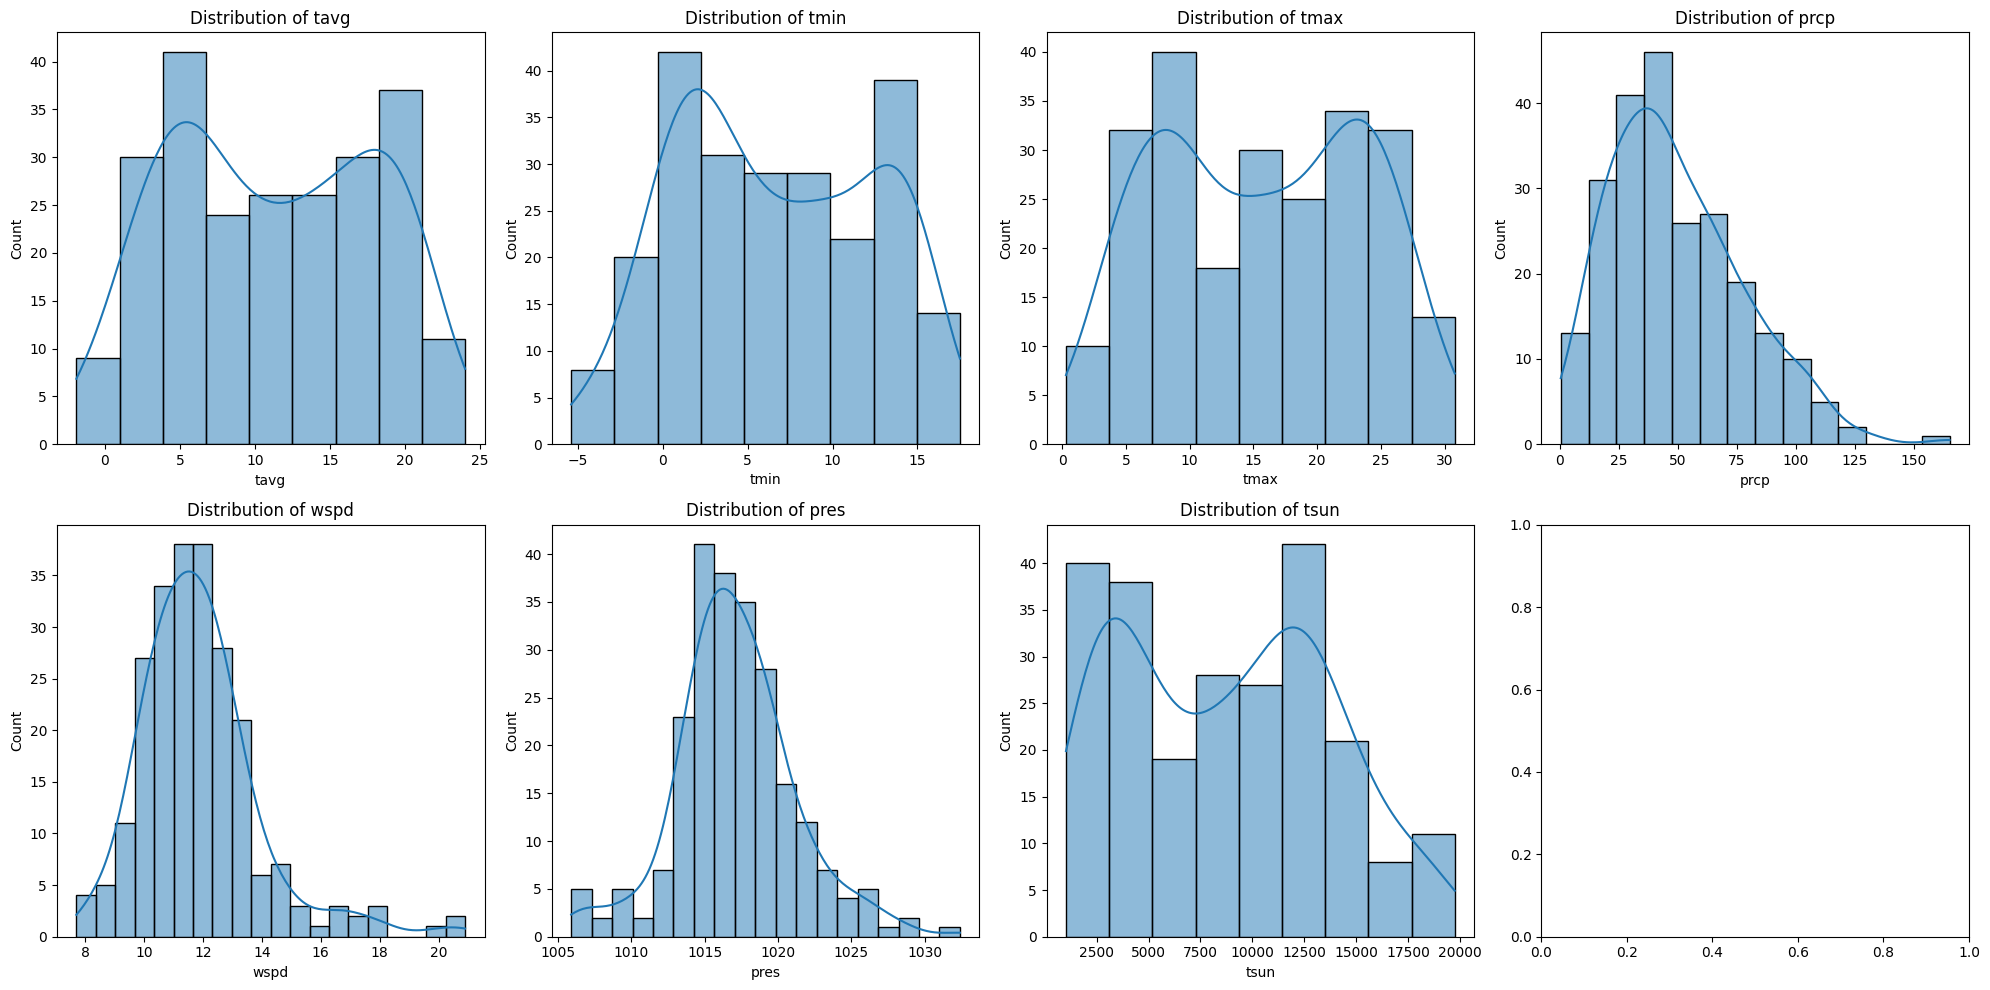

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'tsun']
for i, col in enumerate(columns):
    sns.histplot(data_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


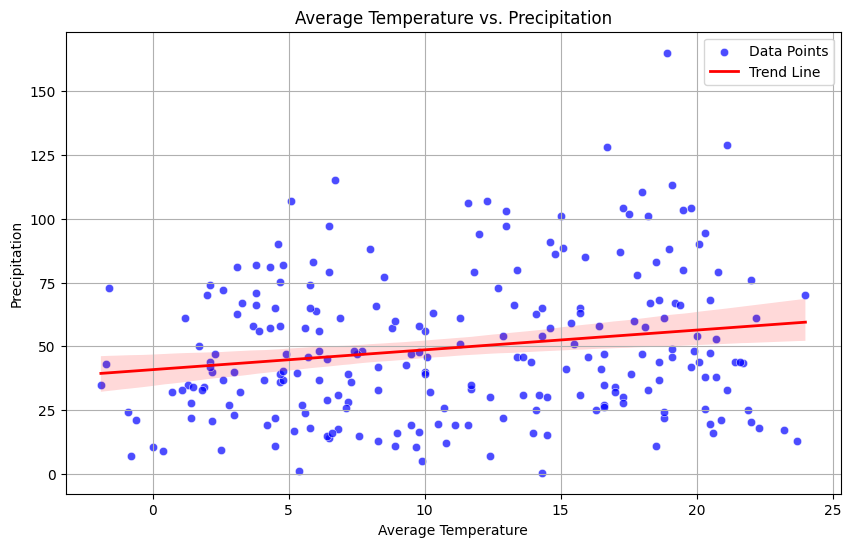

In [44]:
# Scatter plot of average temperature vs. precipitation with line graph
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_cleaned, x='tavg', y='prcp', color='blue', alpha=0.7, label='Data Points')

# Add a trend line
sns.regplot(data=data_cleaned, x='tavg', y='prcp', scatter=False, color='red', line_kws={'linewidth': 2}, label='Trend Line')

plt.title('Average Temperature vs. Precipitation')
plt.xlabel('Average Temperature')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)  
plt.show()



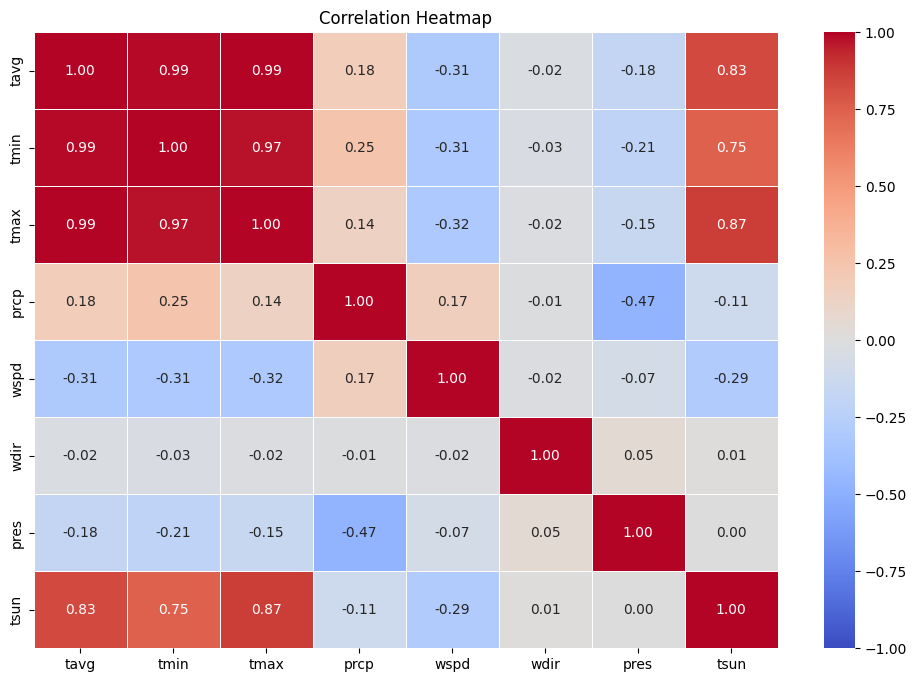

In [45]:
numeric_data_cleaned = data_cleaned.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


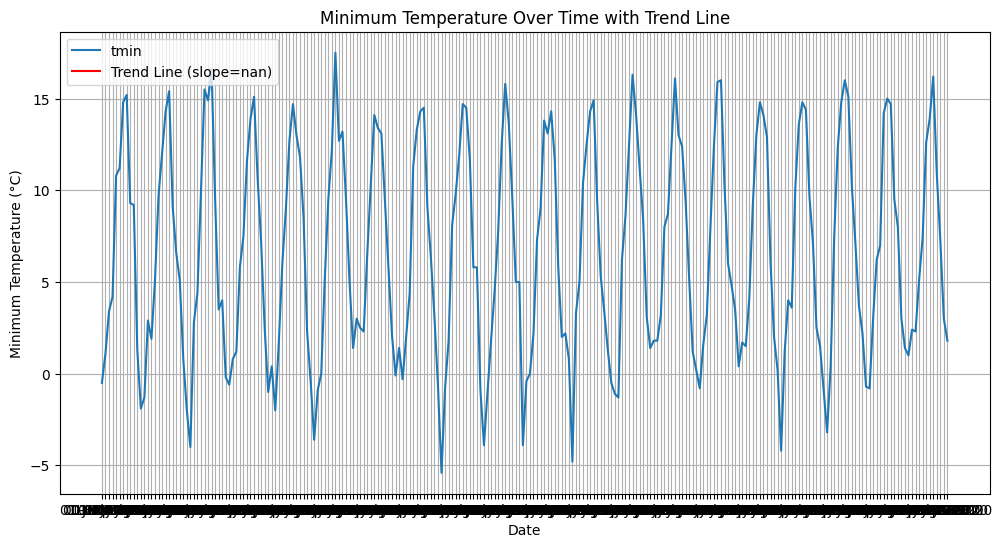

In [47]:
# Plot the line plot with trend line
file_path = '/Users/reshm/cleaned_data.csv'
data = pd.read_csv(file_path)

plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='tmin', data=data, label='tmin')

# Calculate the trend line
slope, intercept, r_value, p_value, std_err = linregress(data.index, data['tmin'])
trend_line = slope * data.index + intercept

# Add the trend line to the plot
plt.plot(data['Date'], trend_line, color='red', label=f'Trend Line (slope={slope:.2f})')

# Customize the plot
plt.title('Minimum Temperature Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

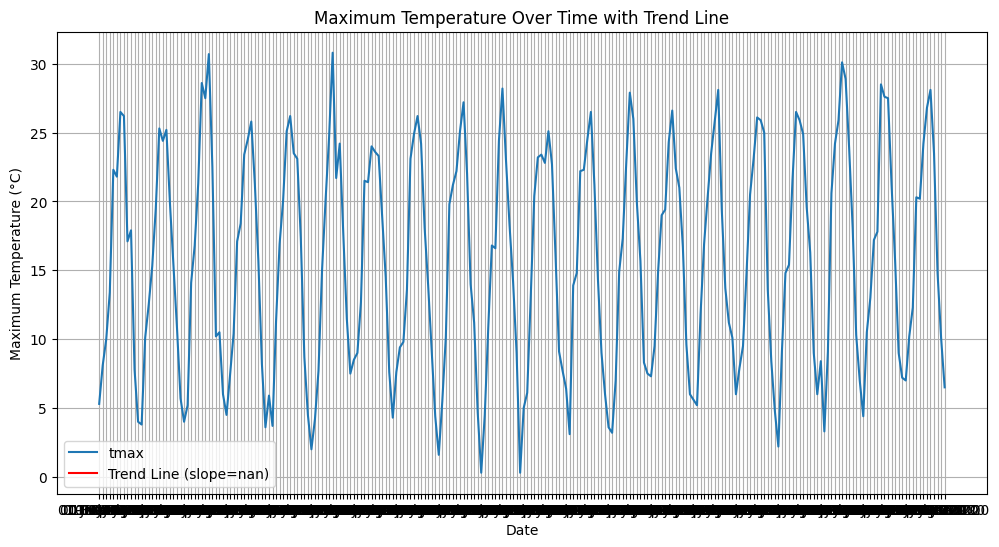

In [48]:
# Plot the line plot with trend line
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='tmax', data=data, label='tmax')

# Calculate the trend line
slope, intercept, r_value, p_value, std_err = linregress(data.index, data['tmax'])
trend_line = slope * data.index + intercept

# Add the trend line to the plot
plt.plot(data['Date'], trend_line, color='red', label=f'Trend Line (slope={slope:.2f})')

# Customize the plot
plt.title('Maximum Temperature Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (°C)')
plt.legend()
plt.grid(True)

plt.show()

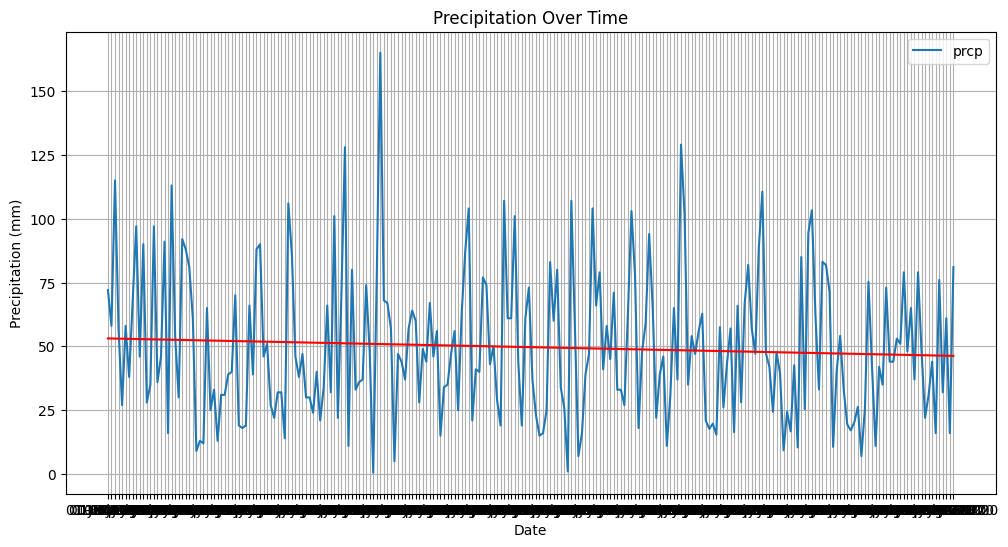

In [49]:
# Plot the line plot with trend line
plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='prcp', data=data, label='prcp')

# Calculate the trend line
slope, intercept, r_value, p_value, std_err = linregress(data.index, data['prcp'])
trend_line = slope * data.index + intercept

# Add the trend line to the plot
plt.plot(data['Date'], trend_line, color='red', label=f'Trend Line (slope={slope:.2f})')

# Show the plot
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


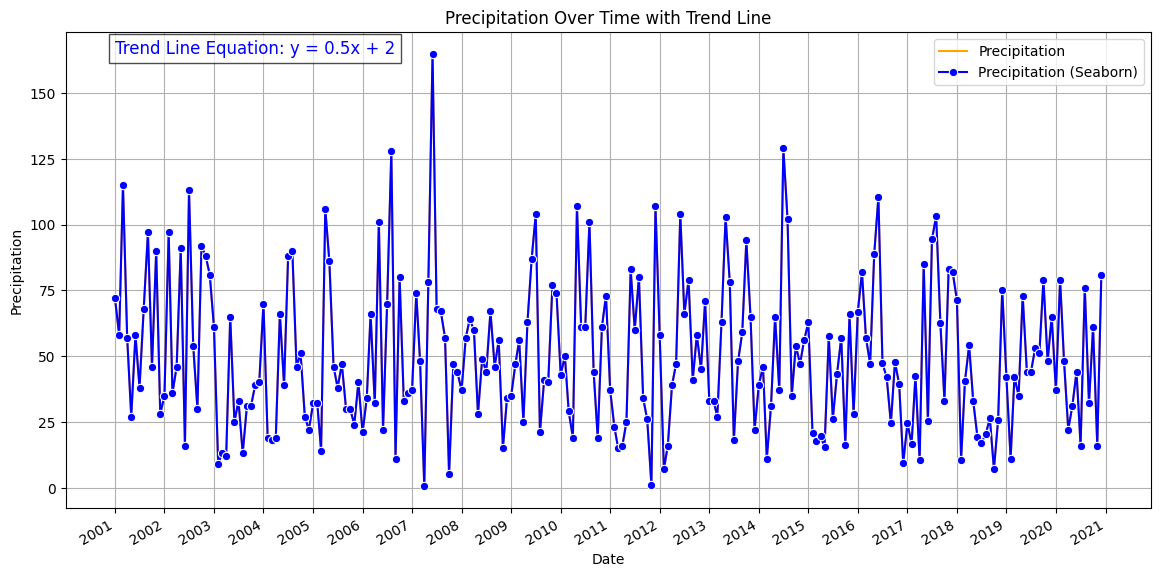

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load the cleaned data
file_path = '/Users/reshm/cleaned_data.csv'
data_cleaned = pd.read_csv(file_path)

# Ensure 'Date' column is in datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Define the trend line equation 
equation = "y = 0.5x + 2"  # Replace with your actual trend line equation

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Precipitation with Matplotlib
plt.plot(data_cleaned['Date'], data_cleaned['prcp'], label='Precipitation', color='orange')

# Format x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year
plt.gcf().autofmt_xdate()  # Rotate date labels

# Add trend line equation text
plt.text(data_cleaned['Date'].min(), data_cleaned['prcp'].max(), f"Trend Line Equation: {equation}", 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))

# Add line plot with markers using Seaborn
sns.lineplot(data=data_cleaned, x='Date', y='prcp', marker='o', color='blue', label='Precipitation (Seaborn)')

# Add titles and labels
plt.title('Precipitation Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()


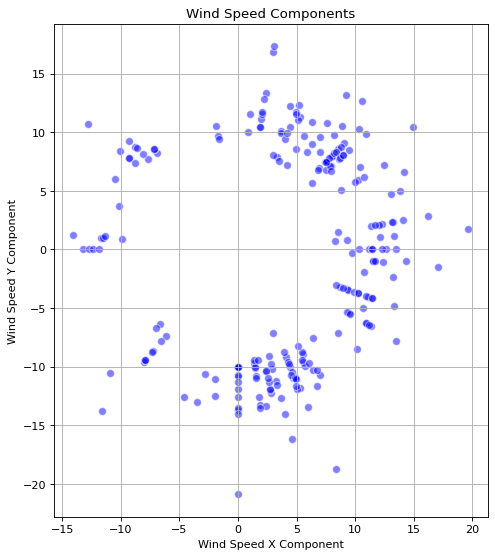

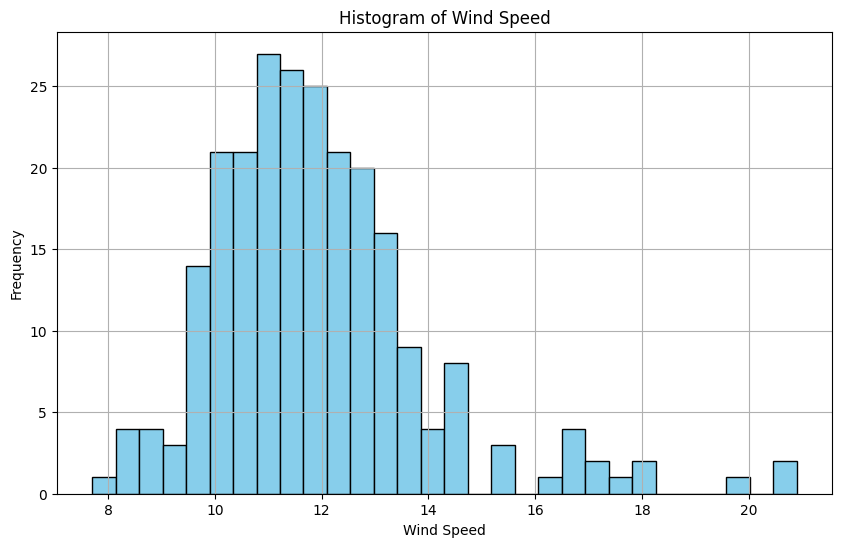

<Figure size 1000x1000 with 0 Axes>

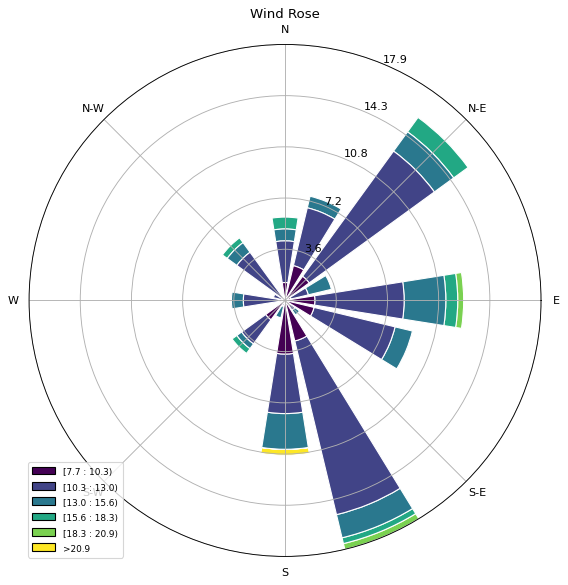

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load the cleaned data
file_path = '/Users/reshm/cleaned_data.csv'
data_cleaned = pd.read_csv(file_path)

# Ensure the 'wdir' column is numeric and in degrees
data_cleaned['wdir'] = pd.to_numeric(data_cleaned['wdir'], errors='coerce')

# Calculate wind speed components
data_cleaned['wspd_x'] = data_cleaned['wspd'] * np.sin(data_cleaned['wdir'] * np.pi / 180.0)
data_cleaned['wspd_y'] = data_cleaned['wspd'] * np.cos(data_cleaned['wdir'] * np.pi / 180.0)

# Plot wind speed components
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.scatter(data_cleaned['wspd_x'], data_cleaned['wspd_y'], alpha=0.5, c='blue', edgecolors='w', s=50)
ax.set_xlabel('Wind Speed X Component')
ax.set_ylabel('Wind Speed Y Component')
ax.set_title('Wind Speed Components')
ax.set_aspect('equal')
plt.grid(True)
plt.show()

# Plot histogram of wind speed
plt.figure(figsize=(10, 6))
data_cleaned['wspd'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot wind rose
fig = plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax()
ax.bar(data_cleaned['wdir'].dropna(), data_cleaned['wspd'].dropna(), normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title('Wind Rose')
plt.show()



In [69]:
file_path = '/Users/reshm/cleaned_data.csv'

data_cleaned= pd.read_csv(file_path)



In [70]:
# Inspect rows with missing 'Date' values
print(data_cleaned[data_cleaned['Date'].isnull()])



Empty DataFrame
Columns: [tavg, tmin, tmax, prcp, wspd, wdir, pres, tsun, Date]
Index: []


In [72]:
# Drop rows with null 'Date' values
data_cleaned = data_cleaned.dropna(subset=['Date'])


In [73]:
plt.savefig('Average Monthly Temperature.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

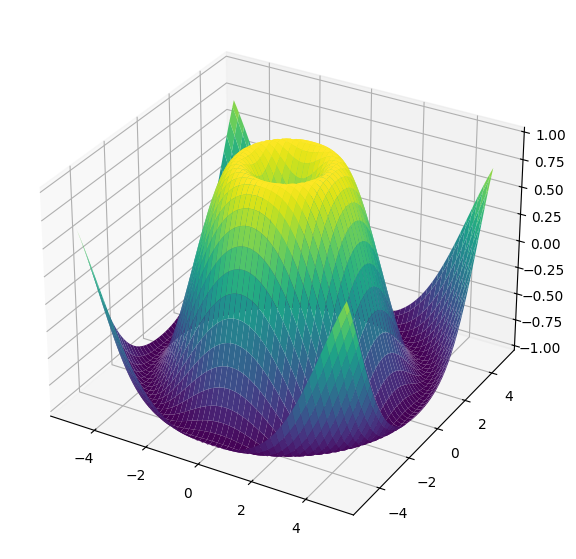

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate sample data
def generate_data(t):
    X = np.linspace(-5, 5, 100)
    Y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(X, Y)
    Z = np.sin(np.sqrt(X**2 + Y**2) + t) 
    return X, Y, Z

# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Initialize plot
X, Y, Z = generate_data(0)
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Update function for animation
def update(t):
    global surface
    X, Y, Z = generate_data(t)
    surface.remove()  # Remove the old surface plot
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'Time = {t:.2f}')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

# Create animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 100), repeat=True)

# Show animation
plt.show()


In [60]:
import pandas as pd

# Load your data
file_path = '/Users/reshm/cleaned_data.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Get descriptive statistics
stats = df.describe()

print(stats)


             tavg        tmin        tmax        prcp        wspd        wdir  \
count  240.000000  236.000000  238.000000  240.000000  240.000000  240.000000   
mean    11.225833    6.611441   15.692017   49.682500   11.929167  128.612500   
std      6.735250    5.739708    7.923898   28.262772    2.052854   85.818846   
min     -1.900000   -5.400000    0.300000    0.500000    7.700000    5.000000   
25%      5.475000    1.800000    8.775000   28.000000   10.600000   48.000000   
50%     10.950000    6.000000   15.700000   45.500000   11.600000  120.000000   
75%     17.300000   12.225000   22.950000   66.200000   12.700000  172.000000   
max     24.000000   17.500000   30.800000  165.000000   20.900000  350.000000   

             pres          tsun  
count   240.00000    240.000000  
mean   1017.05125   8772.275000  
std       4.07548   4984.711214  
min    1005.90000   1026.000000  
25%    1014.90000   4027.500000  
50%    1016.70000   8850.000000  
75%    1019.22500  12720.000000 

In [ ]:
## Analysis of Precipitation Over Time

### Visual Analysis
The line plot below shows precipitation (`prcp`) over time, with a trend line added to illustrate the general direction or pattern of precipitation changes across the dataset.

### Key Observations
1. **Trend Line:**
   - The red trend line represents the overall trend in precipitation over the time period covered by the dataset. It helps identify whether precipitation has generally increased or decreased over time.
   - **Increasing Trend:** If the trend line slopes upwards, it suggests that precipitation has generally increased over the analyzed period, indicating a trend towards wetter conditions or more frequent precipitation events.
   - **Decreasing Trend:** If the trend line slopes downwards, it indicates a general decrease in precipitation, suggesting drier conditions or a reduction in the frequency of precipitation events.
   - **Stable Trend:** If the trend line is relatively flat, it suggests that there have been no significant changes in precipitation levels over time.

2. **Magnitude of Change:**
   - **Rate of Change:** The slope of the trend line provides insight into the rate of change in precipitation. A steeper slope indicates a more significant change over time, while a shallower slope suggests a more gradual change.
   - **Variability:** The spread of data points around the trend line reflects variability in precipitation. Significant deviations from the trend line may indicate periods of unusually high or low precipitation.

### Recommendations
1. **Further Analysis:**
   - **Seasonal Decomposition:** Decompose the time series to separate seasonal effects from the trend. This can help distinguish between regular seasonal variations and long-term trends.
   - **Statistical Testing:** Perform statistical tests (e.g., Mann-Kendall test) to assess the significance of the observed trend.

2. **Impact Assessment:**
   - **Climate Implications:** Analyze how changes in precipitation might impact local climate patterns, agriculture, water resources, and other relevant sectors.
   - **Adaptation Strategies:** Develop strategies to adapt to changing precipitation patterns, such as improving water management practices or adjusting agricultural practices to accommodate changes in precipitation.

3. **Enhanced Forecasting:**
   - **Predictive Models:** Build models to forecast future precipitation based on observed trends and other relevant factors. This can aid in planning and preparation for potential changes in precipitation patterns.


## Analysis of Precipitation Over Time

### Visual Analysis
The line plot below shows precipitation (`prcp`) over time, with a trend line added to illustrate the general direction or pattern of precipitation changes across the dataset.

### Key Observations
1. **Trend Line:**
   - The red trend line represents the overall trend in precipitation over the time period covered by the dataset. It helps identify whether precipitation has generally increased or decreased over time.
   - **Increasing Trend:** If the trend line slopes upwards, it suggests that precipitation has generally increased over the analyzed period, indicating a trend towards wetter conditions or more frequent precipitation events.
   - **Decreasing Trend:** If the trend line slopes downwards, it indicates a general decrease in precipitation, suggesting drier conditions or a reduction in the frequency of precipitation events.
   - **Stable Trend:** If the trend line is relatively flat, it suggests that there have been no significant changes in precipitation levels over time.

2. **Magnitude of Change:**
   - **Rate of Change:** The slope of the trend line provides insight into the rate of change in precipitation. A steeper slope indicates a more significant change over time, while a shallower slope suggests a more gradual change.
   - **Variability:** The spread of data points around the trend line reflects variability in precipitation. Significant deviations from the trend line may indicate periods of unusually high or low precipitation.

### Recommendations
1. **Further Analysis:**
   - **Seasonal Decomposition:** Decompose the time series to separate seasonal effects from the trend. This can help distinguish between regular seasonal variations and long-term trends.
   - **Statistical Testing:** Perform statistical tests (e.g., Mann-Kendall test) to assess the significance of the observed trend.

2. **Impact Assessment:**
   - **Climate Implications:** Analyze how changes in precipitation might impact local climate patterns, agriculture, water resources, and other relevant sectors.
   - **Adaptation Strategies:** Develop strategies to adapt to changing precipitation patterns, such as improving water management practices or adjusting agricultural practices to accommodate changes in precipitation.

3. **Enhanced Forecasting:**
   - **Predictive Models:** Build models to forecast future precipitation based on observed trends and other relevant factors. This can aid in planning and preparation for potential changes in precipitation patterns.
